In [ ]:
!pip install yfinance

In [ ]:

import yfinance as yf
from pandas_datareader import data as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import datetime

path = "/content/drive/MyDrive/comsumer_temperature/datasets/"
ticker = "^N225"
start = datetime.date(1980,1,1)
end =  datetime.datetime.now() + datetime.timedelta(days = 1)

yf.pdr_override()
df = pdr.get_data_yahoo(ticker, start, end)


In [ ]:
df = df.reset_index()

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])
df.info()

In [ ]:
df.to_csv(path + ticker + "_daily_data.csv", encoding="utf8")

In [ ]:
df.head()

In [ ]:
df["POSIX"] = df["Date"].astype(np.int64).values // 10**9
df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month

In [ ]:
df.head()

In [ ]:
df = df[["Date", "POSIX", "Adj Close", "year", "month"]]
df.head()
df.to_csv(path + ticker + "_daily_data.csv", encoding="utf8")

In [ ]:
days = 15

for i in range(1, days):
    df[f"{i}_Adj Close"] = df["Adj Close"].shift(i)
df = df.iloc[days-1:, :]
df.head()

In [ ]:
df.to_csv(path + ticker + "_daily_data_2.csv", encoding="utf8")

In [ ]:
N = len(df["POSIX"])
N_train = round(N * .8)


In [ ]:
X = df.drop(["Adj Close", "Date"], axis=1).values
X

In [ ]:
y = df["Adj Close"].values
y.shape

In [ ]:
X_train, y_train = X[:N_train], y[:N_train]
X_test, y_test = X[N_train:], y[N_train:]

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100,
                           random_state=0)


rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
y_pred = rf.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

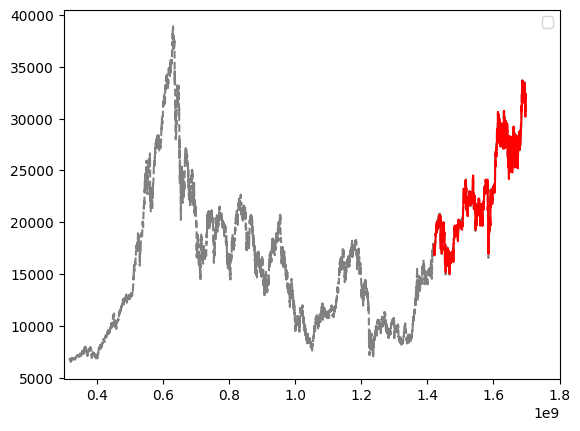

In [ ]:
plt.plot(X, y, color="grey", linestyle="--")
plt.plot(X_test, y_pred, color="red")
plt.legend()
plt.xlim([.3e9, 1.8e9])
plt.show()

In [ ]:
rf2 = RandomForestRegressor(n_estimators=100)
rf2.fit(X_train_std, y_train)

RandomForestRegressor()

In [ ]:
y_pred = rf2.predict(X_test_std)

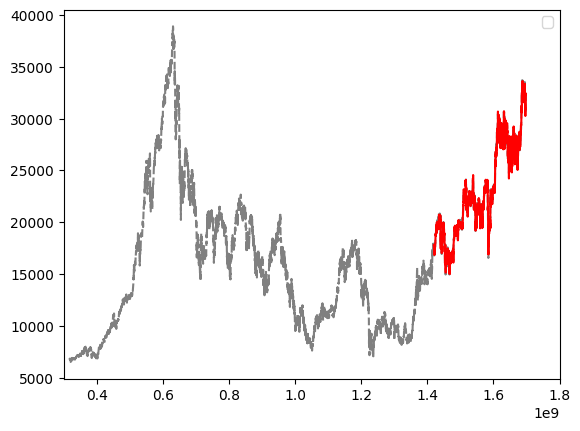

In [ ]:
plt.plot(X, y, color="grey", linestyle="--")
plt.plot(X_test, y_pred, color="red")
plt.xlim([.3e9, 1.8e9])
plt.legend()
plt.show()

In [ ]:
print("Original")
print(f"Train R2: {rf.score(X_train, y_train):.4f}")
print(f"Test R2: {rf.score(X_test, y_test):.4f}")
print("---------------------------------------------")
print("Std")
print(f"Train R2: {rf.score(X_train_std, y_train):.4f}")
print(f"Test R2: {rf.score(X_test_std, y_test):.4f}")


Original
Train R2: 0.9998
Test R2: 0.9939
---------------------------------------------
Std
Train R2: -1.8031
Test R2: -14.0125
